# Gemstone Price Detection Using Multiple Linear Regression 

There are approximately 27,000 gemstone (cubic zirconia) data records in the "cubic_zirconia" dataset. In this notebook, we will analyze the data and create a model to estimate gemstone prices based on the correlation between various properties of diamonds.

#### Qualitative properties 
- <b> Color </b>   : Color of cubic zirconia with D being the best and J being the worst
- <b> Clarity </b> : Refers to the absence of the Inclusions and Blemishes
- <b> Cut </b>     : Describe the cut quality of the cubic zirconia with the increasing order fron Fair, Good, Very Good, Premium to Ideal

#### Quantitative properties 
- <b> Carat </b>   : Weight of the cubic zirconia
- <b> Depth </b>   : Height of the cubic zirconia
- <b> Table </b>   : Width of the cubic zirconia
- <b> Price </b>   : Price of the cubic zirconia
- <b> X </b>       : Length of the cubic zirconia in mm 
- <b> Y </b>       : Width of the cubic zirconia in mm
- <b> Z </b>       : Height of the cubic zirconia in mm


## Import Dataset and Libraries

In [1]:
#importing pandas for data frame
import pandas as pd 

#importing numpy for conducting simple and advanced array operations and scientific computing.
import numpy as np 

#importing math to undertake regular and useful mathematical calculations
import math 

#importing matplotlib for the visualization of data and the development of graphical plots
from matplotlib import pyplot as plt

#importing seaborn and mpl_toolkits for visualization
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

#importing sklearn libraries to model data
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import QuantileTransformer
from sklearn.metrics import mean_squared_error

#importing statsmodel.api for evaluating the model
import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
#loading data into the note book and print the first ten rows(head)
gem_data_set=pd.read_csv('cubic_zirconia.csv')
gem_data_set.head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
5,6,1.02,Ideal,D,VS2,61.5,56.0,6.46,6.49,3.99,9502
6,7,1.01,Good,H,SI1,63.7,60.0,6.35,6.30,4.03,4836
7,8,0.50,Premium,E,SI1,61.5,62.0,5.09,5.06,3.12,1415
8,9,1.21,Good,H,SI1,63.8,64.0,6.72,6.63,4.26,5407
9,10,0.35,Ideal,F,VS2,60.5,57.0,4.52,4.60,2.76,706


In [5]:
# displaying the shape of the dataset
print(gem_data_set.shape)

(26967, 11)


In [6]:
#displaying the colums in the dataset
print(gem_data_set.columns)

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x',
       'y', 'z', 'price'],
      dtype='object')


In [7]:
#Checking the data types
print(gem_data_set.dtypes)

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
x             float64
y             float64
z             float64
price           int64
dtype: object


In [122]:
#showing the information about dataset
gem_data_set_dtype=gem_data_set.dtypes
gem_data_set_missing=gem_data_set.isna().mean().round(4)*100
gem_data_set_desc = gem_data_set.describe(include='all')
dtls_1=pd.DataFrame(gem_data_set_missing, columns=['missing'])
dtls_2=pd.DataFrame(gem_data_set_dtype, columns=['dtype'])
dtls_3=pd.DataFrame(gem_data_set_desc)
dtls_3=dtls_3.T
dtls=pd.concat([dtls_1, dtls_2, dtls_3], axis=1)
dtls.sort_values(by='missing', ascending=False)

,missing,dtype,count,unique,top,freq,mean,std,min,25%,50%,75%,max
depth,2.58,float64,26270.0,NaN,NaN,NaN,61.745147,1.41286,50.8,61.0,61.8,62.5,73.6
Unnamed: 0,0.00,int64,26967.0,NaN,NaN,NaN,13484.0,7784.846691,1.0,6742.5,13484.0,20225.5,26967.0
carat,0.00,float64,26967.0,NaN,NaN,NaN,0.798375,0.477745,0.2,0.4,0.7,1.05,4.5
cut,0.00,object,26967,5,Ideal,10816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,0.00,object,26967,7,G,5661,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,0.00,object,26967,8,SI1,6571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
table,0.00,float64,26967.0,NaN,NaN,NaN,57.45608,2.232068,49.0,56.0,57.0,59.0,79.0
x,0.00,float64,26967.0,NaN,NaN,NaN,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,0.00,float64,26967.0,NaN,NaN,NaN,5.733569,1.166058,0.0,4.71,5.71,6.54,58.9
z,0.00,float64,26967.0,NaN,NaN,NaN,3.538057,0.720624,0.0,2.9,3.52,4.04,31.8


## Data Cleaning and Preprocessing 

In [123]:
#checking for null values in each column
print(gem_data_set.isnull().sum())

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64


In [127]:
#checking for duplicate values in the dataset
duplicates = gem_data_set.duplicated()
print('Number of duplicate rows = %d' % (duplicates.sum()))
print(gem_data_set.shape)

Number of duplicate rows = 0
(26967, 11)


In [125]:
#getting the median values
gem_data_set.median()

C:\Users\gphis\AppData\Local\Temp/ipykernel_5724/1467400390.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  gem_data_set.median()


Unnamed: 0    13484.00
carat             0.70
depth            61.80
table            57.00
x                 5.69
y                 5.71
z                 3.52
price          2375.00
dtype: float64

In [126]:
#replacing the null values with the median values
gem_data_set = gem_data_set.fillna(gem_data_set.median())
print(gem_data_set.isnull().sum())

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
x             0
y             0
z             0
price         0
dtype: int64


C:\Users\gphis\AppData\Local\Temp/ipykernel_5724/2943968673.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  gem_data_set = gem_data_set.fillna(gem_data_set.median())


In [71]:
#Viewing statistic details about the dataset
gem_data_set.describe()

,Unnamed: 0,carat,depth,table,x,y,z,price
count,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,13484.000000,0.798375,61.746564,57.456080,5.729854,5.733569,3.538057,3939.518115
std,7784.846691,0.477745,1.394509,2.232068,1.128516,1.166058,0.720624,4024.864666
min,1.000000,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,6742.500000,0.400000,61.100000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,13484.000000,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,20225.500000,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,26967.000000,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


In [72]:
# Removing invalid null values from columns 'x', 'y', 'z'
gem_data_set = gem_data_set.drop(gem_data_set.loc[gem_data_set.x == 0].index)
gem_data_set = gem_data_set.drop(gem_data_set.loc[gem_data_set.y == 0].index)
gem_data_set = gem_data_set.drop(gem_data_set.loc[gem_data_set.z == 0].index)

gem_data_set.describe()

,Unnamed: 0,carat,depth,table,x,y,z,price
count,26958.000000,26958.000000,26958.000000,26958.000000,26958.000000,26958.000000,26958.000000,26958.000000
mean,13484.289524,0.798190,61.746758,57.455342,5.730105,5.733832,3.539238,3938.311262
std,7785.384674,0.477602,1.394043,2.231227,1.126714,1.164342,0.717838,4023.359737
min,1.000000,0.200000,50.800000,49.000000,3.730000,3.710000,1.070000,326.000000
25%,6743.250000,0.400000,61.100000,56.000000,4.710000,4.712500,2.900000,945.000000
50%,13485.500000,0.700000,61.800000,57.000000,5.690000,5.700000,3.520000,2375.000000
75%,20226.750000,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5358.000000
max,26967.000000,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


In [73]:
#Checking data types of each columns
print(gem_data_set.dtypes)

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
x             float64
y             float64
z             float64
price           int64
dtype: object


In [75]:
# changing object data type to category data type (categorical Encoding)
gem_data_set['cut'] = gem_data_set['cut'].astype('category')
gem_data_set['color'] = gem_data_set['color'].astype('category')
gem_data_set['clarity'] = gem_data_set['clarity'].astype('category')
print(gem_data_set.dtypes)

Unnamed: 0       int64
carat          float64
cut           category
color         category
clarity       category
depth          float64
table          float64
x              float64
y              float64
z              float64
price            int64
dtype: object


In [76]:
#Counting unique entries in 'cut' column
gem_data_set['cut'].value_counts()

Ideal        10816
Premium       6893
Very Good     6030
Good          2439
Fair           780
Name: cut, dtype: int64

In [77]:
#Counting unique entries in 'color' column
gem_data_set['color'].value_counts()

G    5658
E    4917
F    4727
H    4098
D    3344
I    2771
J    1443
Name: color, dtype: int64

In [78]:
#Counting unique entries in 'clarity' column
gem_data_set['clarity'].value_counts()

SI1     6570
VS2     6098
SI2     4571
VS1     4092
VVS2    2531
VVS1    1839
IF       894
I1       363
Name: clarity, dtype: int64

In [79]:
#Assigning numerical values for categorical data
gem_data_set['cut'] = gem_data_set["cut"].cat.codes
gem_data_set['color'] = gem_data_set["color"].cat.codes
gem_data_set['clarity'] = gem_data_set["clarity"].cat.codes
gem_data_set.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,2,1,2,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,3,3,1,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,4,1,7,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,2,2,4,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,2,2,6,60.4,59.0,4.35,4.43,2.65,779


In [32]:
#printing the new data types
print(gem_data_set.dtypes)

carat      float64
cut           int8
color         int8
clarity       int8
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object


In [80]:
#dropping "Unnamed: 0" index column that is not  required
gem_data_set = gem_data_set.drop(['Unnamed: 0'], axis = 1)
gem_data_set.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,2,1,2,62.1,58.0,4.27,4.29,2.66,499
1,0.33,3,3,1,60.8,58.0,4.42,4.46,2.70,984
2,0.90,4,1,7,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,2,2,4,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,2,2,6,60.4,59.0,4.35,4.43,2.65,779


In [81]:
# displaying the final shape of the dataset
gem_data_set.shape

(26958, 10)

In [82]:
# Checking lower limit and upper limit of carat column

#Upper limit
factor = 4
upper_limit = gem_data_set['carat'].mean() + gem_data_set['carat'].std() * factor 
print("Upper Limit : " + str(upper_limit))

#lower limit
lower_limit = gem_data_set['carat'].mean() - gem_data_set['carat'].std() * factor 
print("Lower Limit : " + str(lower_limit))

Upper Limit : 2.708599457195241
Lower Limit : -1.1122199038159308


## Data Visualization

<AxesSubplot:>

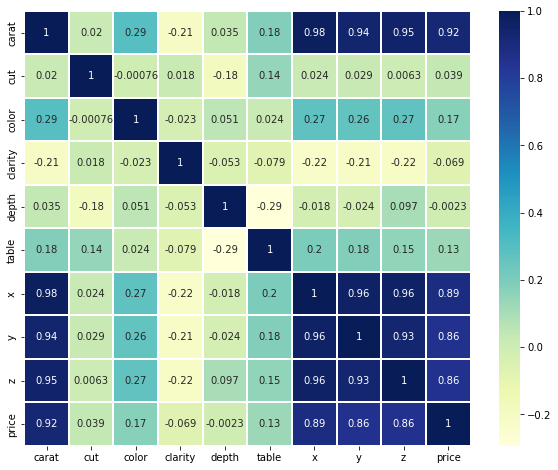

In [85]:
#Checking the attributes in the dataframe for coorelations.

#calculating correlation of all gemstone properties
corr_matrix = gem_data_set.corr()

#Visualizing the dataset through HEATMAP
f, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True, linewidths=2)

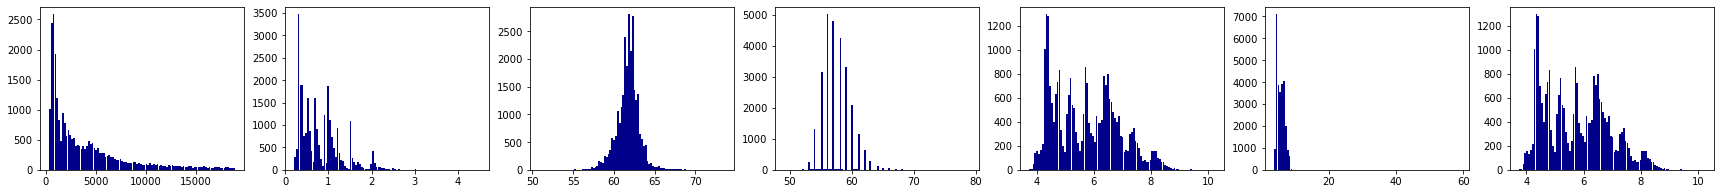

In [95]:
#Visualizing each and every attribute data through Histogram

fig,ax = plt.subplots(1,7, figsize = (30,3))
ax[0].hist(gem_data_set['price'],color = "darkblue",bins=100, rwidth=0.95)
ax[0].axis('on')
ax[1].hist(gem_data_set['carat'], color = "darkblue",bins=100, rwidth=0.95)
ax[1].axis('on')
ax[2].hist(gem_data_set['depth'], color = "darkblue",bins=100, rwidth=0.95)
ax[2].axis('on')
ax[3].hist(gem_data_set['table'],color = "darkblue",bins=100, rwidth=0.95)
ax[3].axis('on')
ax[4].hist(gem_data_set['x'],color = "darkblue",bins=100, rwidth=0.95)
ax[4].axis('on')
ax[5].hist(gem_data_set['y'],color = "darkblue",bins=100, rwidth=0.95)
ax[5].axis('on')
ax[6].hist(gem_data_set['x'],color = "darkblue",bins=100, rwidth=0.95)
ax[6].axis('on')
plt.show()

In [96]:
#Handling Outliers 
factor = 4

upper_limit = gem_data_set['price'].mean() + gem_data_set['price'].std() * factor 
lower_limit = gem_data_set['price'].mean() - gem_data_set['price'].std() * factor 
gem_data_new = gem_data_set[(gem_data_set['price'] < upper_limit) & (gem_data_set['price'] > lower_limit)]

upper_limit = gem_data_set['carat'].mean() + gem_data_set['carat'].std() * factor 
lower_limit = gem_data_set['carat'].mean() - gem_data_set['carat'].std() * factor 
gem_data_new = gem_data_set[(gem_data_set['carat'] < upper_limit) & (gem_data_set['carat'] > lower_limit)]

upper_limit = gem_data_set['depth'].mean() + gem_data_new['depth'].std() * factor 
lower_limit = gem_data_set['depth'].mean() - gem_data_new['depth'].std() * factor 
gem_data_new = gem_data_new[(gem_data_new['depth'] < upper_limit) & (gem_data_new['depth'] > lower_limit)]

upper_limit = gem_data_new['table'].mean() + gem_data_new['table'].std() * factor 
lower_limit = gem_data_new['table'].mean() - gem_data_new['table'].std() * factor 
gem_data_new = gem_data_new[(gem_data_new['table'] < upper_limit) & (gem_data_new['table'] > lower_limit)]

upper_limit = gem_data_new['x'].mean() + gem_data_new['x'].std() * factor 
lower_limit = gem_data_new['x'].mean() - gem_data_new['x'].std() * factor 
gem_data_new = gem_data_new[(gem_data_new['x'] < upper_limit) & (gem_data_new['x'] > lower_limit)]

upper_limit = gem_data_new['y'].mean() + gem_data_new['y'].std() * factor 
lower_limit = gem_data_new['y'].mean() - gem_data_new['y'].std() * factor 
gem_data_new = gem_data_new[(gem_data_new['y'] < upper_limit) & (gem_data_new['y'] > lower_limit)]

upper_limit = gem_data_new['z'].mean() + gem_data_new['z'].std() * factor 
lower_limit = gem_data_new['z'].mean() - gem_data_new['z'].std() * factor 
gem_data_new = gem_data_new[(gem_data_new['z'] < upper_limit) & (gem_data_new['z'] > lower_limit)]